In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
import collections
import functools
import seaborn as sns
from scipy.interpolate import interp1d
import matplotlib as mpl

pgf_with_custom_preamble = {
    "text.usetex": False,    # use inline math for ticks
    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
}

def figsize(scale, height_ratio=1.0):
    fig_width_pt = 344.43306                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = height_ratio*fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "sans-serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }

sns.set_style('ticks')
sns.set_context('poster')
sns.set_palette('dark', 40)

colors = sns.color_palette('dark', 40)

mpl.rcParams.update(pgf_with_latex)

# I make my own newfig and savefig functions
def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

def savefig(filename):
    plt.savefig('{}.pgf'.format(filename))
    plt.savefig('{}.pdf'.format(filename))

%matplotlib inline

In [14]:
rg_cycle, ee_cycle, rg_no_cycle, ee_no_cycle, chain_size_cycle, chain_size_no_cycle = [], [], [], [], [], []
for f in os.listdir('cycle/'):
    d = np.loadtxt(os.path.join('cycle', f))
    ee_cycle.extend(d[:, 1])
    rg_cycle.extend(d[:, 2])
    print('c', f, d.shape)
    chain_size_cycle.extend(d[:, 3])
for f in os.listdir('no_cycle//'):
    d = np.loadtxt(os.path.join('no_cycle', f))
    ee_no_cycle.extend(d[:, 1])
    rg_no_cycle.extend(d[:, 2])
    print('nc', f, d.shape)
    chain_size_no_cycle.extend(d[:, 3])

c gmx_85554_ee_rg.csv (92, 4)
c gmx_201101_ee_rg.csv (116, 4)
c gmx_488359_ee_rg.csv (166, 4)
c gmx_796185_ee_rg.csv (154, 4)
c gmx_932558_ee_rg.csv (154, 4)
nc gmx_163467_ee_rg.csv (80, 4)
nc gmx_159450_ee_rg.csv (114, 4)
nc gmx_290611_ee_rg.csv (121, 4)
nc gmx_450547_ee_rg.csv (111, 4)


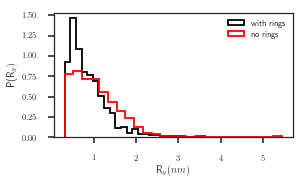

In [27]:
fig, ax = newfig(0.9)
_ = ax.hist(rg_cycle, normed=True, bins=25, label='with rings', color='k', histtype='step', alpha=1.0, linewidth=1.8)
_ = ax.hist(rg_no_cycle, normed=True, bins=25, label='no rings', color='r', histtype='step', alpha=1.0, linewidth=1.8)
ax.legend()
ax.set_xlabel('R_g (nm)')
ax.set_ylabel('P(R_g)')
fig.tight_layout()
savefig('rg_with_rings_no_rings')

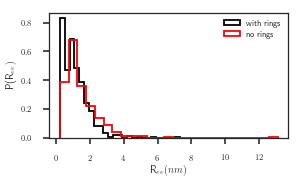

In [25]:
fig, ax = newfig(0.9)
_ = ax.hist(ee_cycle, normed=True, bins=25, label='with rings', color='k', histtype='step', alpha=1.0, linewidth=1.8)
_ = ax.hist(ee_no_cycle, normed=True, bins=25, label='no rings', color='r', histtype='step', alpha=1.0, linewidth=1.8)
ax.legend()
ax.set_xlabel('R_{ee} (nm)')
ax.set_ylabel('P(R_{ee})')
fig.tight_layout()
savefig('ee_with_rings_no_rings')

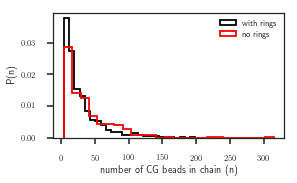

In [29]:
fig, ax = newfig(0.9)
_ = ax.hist(chain_size_cycle, normed=True, bins=25, label='with rings', color='k', histtype='step', alpha=1.0, linewidth=1.8)
_ = ax.hist(chain_size_no_cycle, normed=True, bins=25, label='no rings', color='r', histtype='step', alpha=1.0, linewidth=1.8)
ax.legend()
ax.set_xlabel('number of CG beads in chain (n)')
ax.set_ylabel('P(n)')
fig.tight_layout()
savefig('chain_size_rings_no_rings')